<a href="https://colab.research.google.com/github/whyrzky/DS-Portfolio-Projects/blob/main/Machine%20Learning%3A%20Supervised%20Learning_(Prediction%20in%202nd%20Car%20Prices).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Challenges ML-Supervised

### Goals : Do Data Understanding and Data Preparation for Autombile dataset for Predict Car Price

**Pada Lab Challenges kali ini lakukan proses Business Understanding -> Data Understanding -> Data Preparation pada Automobile_data.csv**


![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)
[Dataset](https://www.kaggle.com/toramky/automobile-dataset)

#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn')

#### Import dataset

In [ ]:
df = pd.read_csv('Automobile_data.csv')

**quick look**

In [ ]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Exploratory Data Analysis (EDA)

### Cleansing Data

**Check for Duplicates Data**

In [ ]:
df.duplicated().any()

False

**Missing Values and Data Type**

In [ ]:
columns = list(df.columns)

for kolom in columns:
    df.loc[df[kolom]=='?', kolom] = np.nan

In [ ]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['Kolom', 'Jumlah']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['Kolom', 'Persen']
    miss = miss1.merge(miss2, how='inner', on='Kolom')
    miss = miss[miss['Jumlah']!=0]
    kolom_miss = list(miss['Kolom'])
    tipe = []
    data = []
    for kolom in kolom_miss:
        tipe.append(df[kolom].dtype)
        data.append(df[kolom][100])
    miss['Tipe'] = tipe
    miss['Contoh'] = data
    return miss

In [ ]:
missing_data(df)

,Kolom,Jumlah,Persen,Tipe,Contoh
1,normalized-losses,41,20.00000,object,106
5,num-of-doors,2,0.97561,object,four
18,bore,4,1.95122,object,3.33
19,stroke,4,1.95122,object,3.47
21,horsepower,2,0.97561,object,97
22,peak-rpm,2,0.97561,object,5200
25,price,4,1.95122,object,9549


In [ ]:
#change data type for missing values
miss_float = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

for kolom in miss_float:
    df[kolom] = df[kolom].astype('float')

In [ ]:
missing_data(df)

,Kolom,Jumlah,Persen,Tipe,Contoh
1,normalized-losses,41,20.00000,float64,106.0
5,num-of-doors,2,0.97561,object,four
18,bore,4,1.95122,float64,3.33
19,stroke,4,1.95122,float64,3.47
21,horsepower,2,0.97561,float64,97.0
22,peak-rpm,2,0.97561,float64,5200.0
25,price,4,1.95122,float64,9549.0


In [ ]:
miss_float

for kolom in miss_float:
    df[kolom] = df[kolom].fillna(df[kolom].median())

In [ ]:
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [ ]:
missing_data(df)

,Kolom,Jumlah,Persen,Tipe,Contoh


In [ ]:
df.shape

(205, 26)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0


**Make Some Visualization**

In [ ]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

**Apakah tipe bahan bakar mempengaruhi harga?**

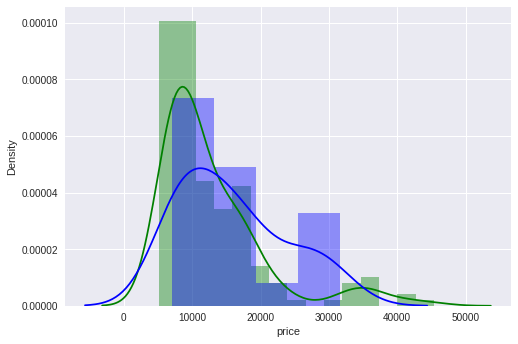

In [ ]:
sns.distplot(df[df['fuel-type']=='gas']['price'], color='green')
sns.distplot(df[df['fuel-type']=='diesel']['price'], color='blue')

# Data Preparation

#### Encode Data

In [ ]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,2.0,115.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
6,1.0,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844.0,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
7,1.0,115.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954.0,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
8,1.0,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086.0,ohc,five,131.0,mpfi,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0
9,0.0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053.0,ohc,five,131.0,mpfi,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,10295.0


In [ ]:
non_ordinal = ['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']
label_encode = ['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']
find_replace = ['num-of-cylinders']

Label Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for kolom in label_encode:
    df[kolom] = le.fit_transform(df[kolom])

One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=non_ordinal)

Find and Replace

In [ ]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
num_replace = {
    'num-of-cylinders' : { 'four':4, 'six':6, 'five': 5, 'three': 3, 'twelve': 12, 'two':2, 'eight': 8}
}

df.replace(num_replace, inplace=True)

In [ ]:
df.head(2)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.0,115.0,1,0,1,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Train Test Split (1, Nabila)

In [ ]:
data = df[['wheel-base','engine-size','highway-mpg','price']]
data.head(5)

,wheel-base,engine-size,highway-mpg,price
0,88.6,130.0,27.0,13495.0
1,88.6,130.0,27.0,16500.0
2,94.5,152.0,26.0,16500.0
3,99.8,109.0,30.0,13950.0
4,99.4,136.0,22.0,17450.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train-test split
y = data['price'].values
X = data.drop(['price'], axis = 1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train.shape

(164, 3)

In [ ]:
X_test.shape

(41, 3)

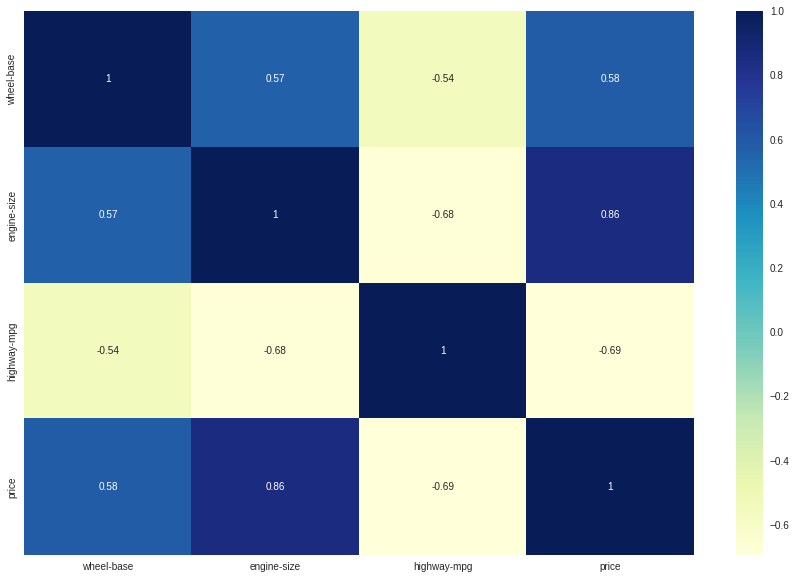

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Dari heatmap di atas, kita dapat menyimpulkan bahwa korelasi tertinggi adalah engine-size terhadap price, vice versa.

### Assignment

1. Lakukan modeling dengan menggunakan algoritma regresi, sehingga didapatkan model yang dapat melakukan prediksi untuk harga mobil bekas (dataset diatas)
2. Perhatikan algoritma dan metrics yang dipakai untuk kasus ini. (Telaah kembali beda regresi dan klasifikasi)

### Using Stats Model (2, Aji)

In [ ]:
# load statsmodel module 
import statsmodels.api as sm

# Modeling with StatMododel
X_train_int = sm.add_constant(X_train)
linear_reg_sm = sm.OLS(y_train, X_train_int).fit()

In [ ]:
# check model summary
linear_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     155.4
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.41e-47
Time:                        14:04:33   Log-Likelihood:                -1584.4
No. Observations:                 164   AIC:                             3177.
Df Residuals:                     160   BIC:                             3189.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.131e+04   7028.757     -1.610      0.109   -2.52e+04    2567.732
x1           147.0767     65.505      2.245      0.026      17.711     276.443
x2           126.2372     10.744     11.750      0.000     105.019     147.456
x3          -196.9009     59.166     -3.328      0.001    -313.747     -80.054
==============================================================================
Omnibus:                       38.965   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.533
Skew:                           0.958   Prob(JB):                     3.30e-23
Kurtosis:                       6.388   Cond. No.                     3.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **R-squared**: explain how much of the independent variables is explained by changes in our dependent variable. Based on the result, we can say that **our model explain 74,5% of the change in target variable**.

- **coef**: The coefficients of the independent variables in the regression equation, can be used to explain the impact of variable to model prediction (Gonna explain it later)

- **$t$**: t-statistic, can be used as feature importance (Gonna explain it later)

- **$P > |t|$**: It uses the t-statistic to produce the p-value. Rule of thumb: If p-value < 0.05, then the variable affect dependent variable.

- **Durbin-Watson**: Measurement of homoscedasticity. Ideal value between 1 and 2.

- **Jarque-Bera**: Measurement of normalcy of residual distribution close to 0 indicate normalcy.

- **Omnibus**: Same as **Jarque-Bera**

- **Cond. No.**: Measurement of the sensitivity of our model as compared to the size of chanes in the data. High condition number implied multicolinearity.

We can conclude that our model is relevant, due the R-Squared is 75,5%. Its mean our variables are 75,5% representing to our model.

In [ ]:
# check model weights
linear_reg_sm.params

array([-11313.37176869,    147.07671217,    126.23717693,   -196.90085133])

### Using Scikit-Learn (3, Yolanda)
In order to get prediction from our linear model

Why we use scikit-learn in this model? what the function?

In [ ]:
# load linear regression model
from sklearn.linear_model import LinearRegression
# define linear regression model
linear_reg_scikit = LinearRegression()
# fit model to data
linear_reg_scikit.fit(X_train, y_train)

LinearRegression()

In [ ]:
# check model coefficient
linear_reg_scikit.coef_

array([ 147.07671217,  126.23717693, -196.90085133])

Darir hasil koefisien di atas, dapat disimpulkan variable .. 

### Model Intepretation with Feature Importance (4, Wahyu)

In [ ]:
## create function to estimate r2 for each variables
def r2_est(X,y):
    return metrics.r2_score(y,LinearRegression().fit(X,y).predict(X))

In [ ]:
# import metrics method for model evaluation
import sklearn.metrics as metrics

# check if function already functional
r2_est(X_train, y_train)

0.7445148115754419

In [ ]:
# create prediction
pred_result = linear_reg_scikit.predict(X_test)

# evaluation using Root Mean Squared Error (MSE)
np.sqrt(metrics.mean_squared_error(y_test, pred_result))

3710.484276361141

In [ ]:
# evaluation using Mean Absolute Percentage Error
metrics.mean_absolute_percentage_error(y_test, pred_result)

0.19667292490374794

In [ ]:
# check R-squared
linear_reg_scikit.score(X_train, y_train)

0.7445148115754419

In [ ]:
# save column name to var_name variables
var_name = data.drop(['price'], axis = 1).columns

In [ ]:
# feature importance calculation
r2_impact = list()
for j in range(X_train.shape[1]):
  selection = [i for i in range(X_train.shape[1]) if i!=j]
  r2_impact.append(((r2_est(X_train,y_train) - r2_est(X_train[:,selection],y_train)) ,var_name[j]))

In [ ]:
# check variable importance
r2_impact

[(0.008049759584371374, 'wheel-base'),
 (0.2204390955346449, 'engine-size'),
 (0.017684768552824748, 'highway-mpg')]

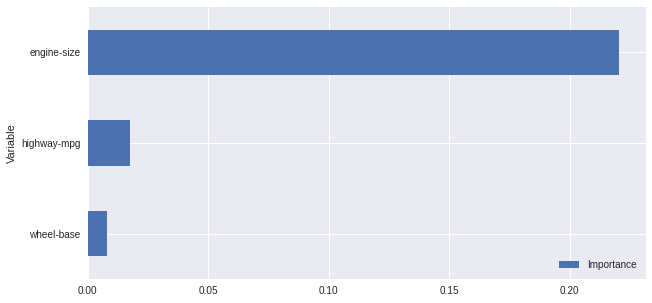

In [ ]:
# visualize feature importance
pd.DataFrame(r2_impact, columns=['Importance', 'Variable']). \
sort_values(by='Importance'). \
plot(x = 'Variable', y = 'Importance', kind = 'barh', figsize=(10, 5))

It can be conclude that engine-size is the variable that has most significant relationship with price. Followed by highway-mpg, wheel-base.

### Model Intepretation with Weigth Plot (5, Made)

In [ ]:
# check model weight/param
linear_reg_sm.params

array([-11313.37176869,    147.07671217,    126.23717693,   -196.90085133])

In [ ]:
# check weight standard error
linear_reg_sm.bse

array([7028.75740952,   65.50513262,   10.74399595,   59.16580475])

In [ ]:
# create feature_weight dataframe
feature_weight = pd.DataFrame(
    {"var_name" : ['const','wheel-base','engine-size','highway-mpg'], 
     "coef" : linear_reg_sm.params, 
     "sd_er" : linear_reg_sm.params + linear_reg_sm.bse,
     }
)

# check feature weight
feature_weight

,var_name,coef,sd_er
0,const,-11313.371769,-4284.614359
1,wheel-base,147.076712,212.581845
2,engine-size,126.237177,136.981173
3,highway-mpg,-196.900851,-137.735047


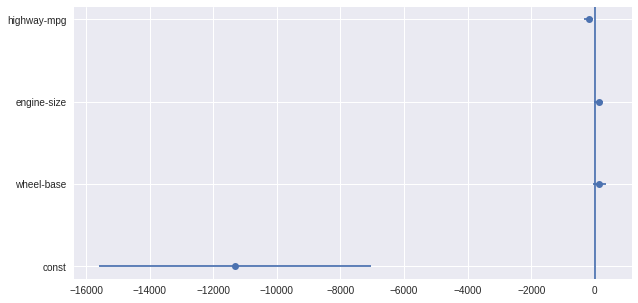

In [ ]:
# visualize weight with its standard error
plt.figure(figsize=(10,5))
plt.errorbar(feature_weight['coef'], feature_weight['var_name'], xerr = feature_weight['sd_er'], fmt='o')
plt.axvline(x=0)
plt.show()

Engine-size and wheel-base has positive impact on price. But, highway-mpg has negative impact on price